$$ y+2.m.w_0*y'+w_0^2.y''=0 $$

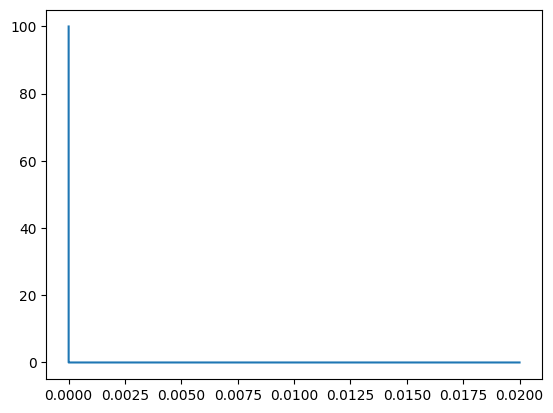

In [20]:
import numpy as np
import matplotlib.pyplot as plt


# y+2.m.w_0*y'+w_0^2.y''=0 
m=np.sqrt(2)
f0=1e3
w0=2*np.pi*f0
y=[100]
yd=[0]
ydd=[0]
Ts=1e-7
sime_time=20e-3
nsteps= int(sime_time//Ts)
for i in range(nsteps):

    yd.append(ydd[i]+(ydd[i]+ydd[i-1])*Ts/2)
    y.append(yd[i]+(yd[i]+yd[i-1])*Ts/2)
    ydd.append((-1/w0**2)*(y[i] +2*m*w0*yd[i]))
    


time = np.arange(0,  Ts*len(y), Ts)
plt.plot(time, y)

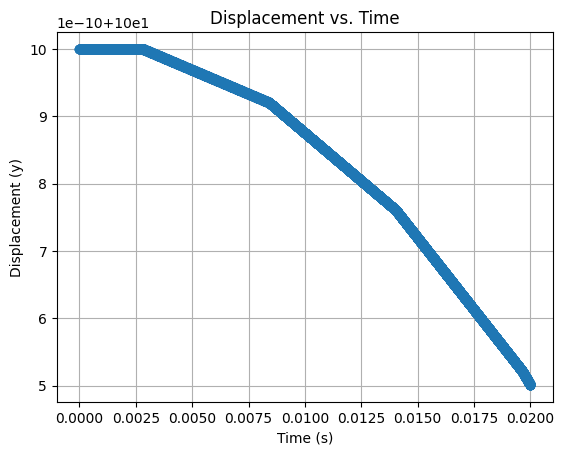

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
m = np.sqrt(2)
f0 = 1e3
w0 = 2 * np.pi * f0

# Initial conditions
y = [100]
yd = [0]
ydd = [0]

# Time step and simulation time
Ts = 1e-6
sim_time = 20e-3
nsteps = int(sim_time // Ts)

# Time evolution using numerical integration (Euler method)
for i in range(1, nsteps):  # Start from i=1 to avoid index errors
    # Update the velocity and position based on previous values
    yd.append(yd[i-1] + Ts * ydd[i-1])
    y.append(y[i-1] + Ts * yd[i-1])

    # Update the acceleration based on the system's differential equation
    ydd.append((-1 / w0**2) * (y[i] + 2 * m * w0 * yd[i]))

# Time array for plotting
time = np.arange(0, sim_time, Ts)

# Plot results
plt.plot(time, y, marker="o")
plt.xlabel('Time (s)')
plt.ylabel('Displacement (y)')
plt.title('Displacement vs. Time')
plt.grid(True)
plt.show()


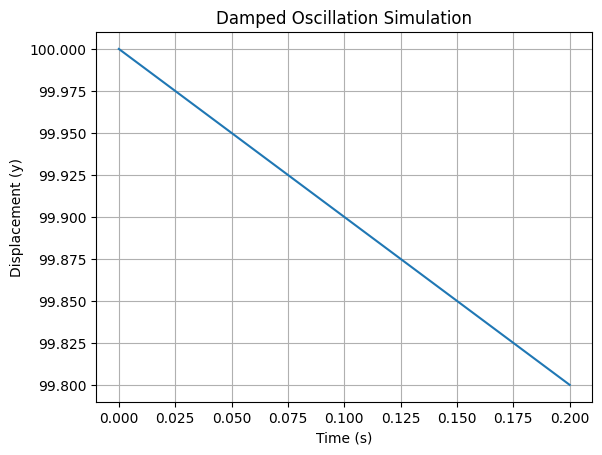

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Equation: y'' + 2m*w0*y' + w0^2*y = 0
m = 0.1*np.sqrt(2)
f0 = 1e3
w0 = 2 * np.pi * f0

Ts = 1e-7
sim_time = 200e-3
nsteps = int(sim_time // Ts)

# Initialize arrays
y = [100]  # Initial displacement
yd = [-1]   # Initial velocity
ydd = [(-1/w0**2) * (y[0] + 2 * m * w0 * yd[0])]  # Initial acceleration

# Time stepping using a semi-implicit method
for i in range(nsteps):
    ydd.append((-1/w0**2) * (y[i] + 2 * m * w0 * yd[i]))  # Compute acceleration
    yd.append(yd[i] + ydd[i+1] * Ts)  # Update velocity (semi-implicit)
    y.append(y[i] + yd[i+1] * Ts)  # Update position (semi-implicit)

# Time vector
time = np.arange(0, Ts * len(y), Ts)

# Plot results
plt.plot(time, y)
plt.xlabel("Time (s)")
plt.ylabel("Displacement (y)")
plt.title("Damped Oscillation Simulation")
plt.grid()
plt.show()


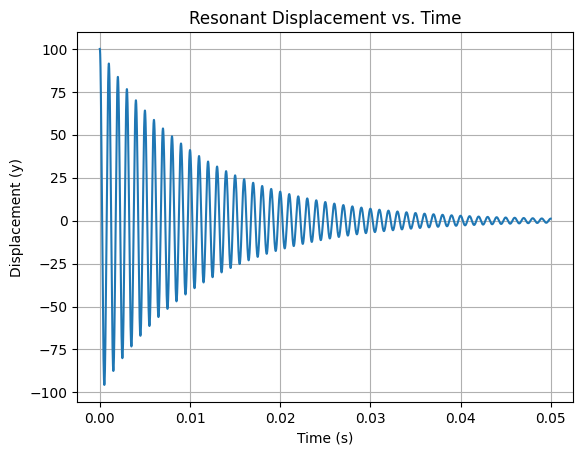

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
m = 0.01*np.sqrt(2)
f0 = 1e3
w0 = 2 * np.pi * f0

# Initial conditions
y0 = 100  # initial displacement
v0 = 0    # initial velocity
y = [y0]
v = [v0]
Ts = 1e-6  # time step
sim_time = 50e-3
nsteps = int(sim_time // Ts)

# Velocity Verlet integration (second-order accurate)
for i in range(1, nsteps):
    # Calculate acceleration from the system equation
    a = -w0**2 * y[i-1] - 2 * m * w0 * v[i-1]
    
    # Update position and velocity
    y_new = y[i-1] + Ts * v[i-1] + 0.5 * Ts**2 * a
    a_new = -w0**2 * y_new - 2 * m * w0 * v[i-1]  # New acceleration at y_new
    v_new = v[i-1] + 0.5 * Ts * (a + a_new)  # Update velocity with new acceleration
    
    # Append to lists
    y.append(y_new)
    v.append(v_new)

# Time array for plotting
time = np.arange(0,Ts*len(y), Ts)

# Plot results
plt.plot(time, y)
plt.xlabel('Time (s)')
plt.ylabel('Displacement (y)')
plt.title('Resonant Displacement vs. Time')
plt.grid(True)
plt.show()
